In [4]:
import pandas as pd

# New working taxi data sample (hosted by a different source)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

df = pd.read_csv(url)
df.head()
# Check the first 5 rows of the dataset
df.head()
# Check the shape and column types
df.info()
# Summary statistics of numeric columns
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


   distance_km  fare_naira
0            1         400
1            2         500
2            3         600
3            4         700
4            5         800
5            6         900
6            7        1000
7            8        1100
8            9        1200
9           10        1300
Predicted Fare for 12 km: ₦1500.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


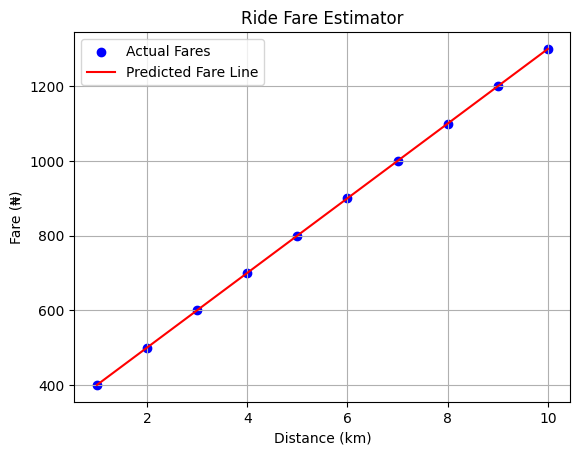

Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00
R² Score (R-squared): 1.00


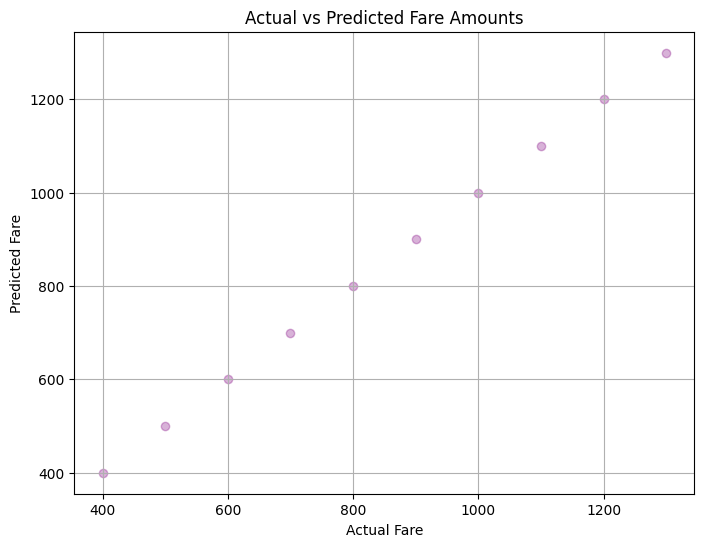

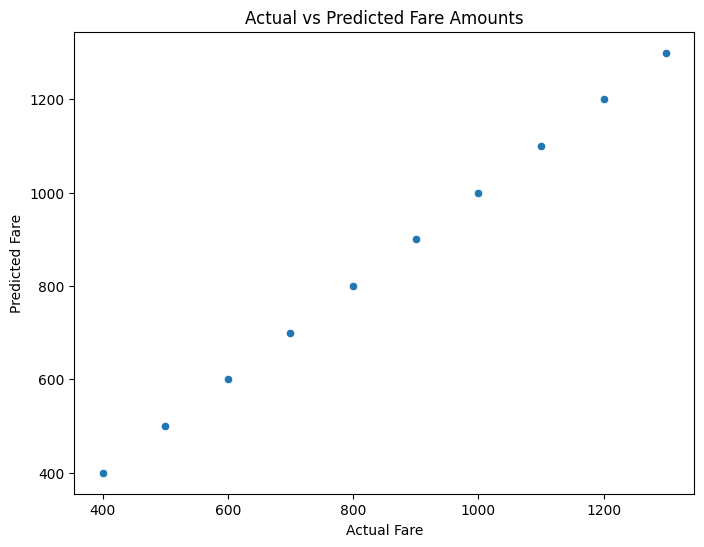

In [18]:
# 🛺 Ride Fare Estimator
##This project predicts NYC taxi ride fares using features like trip distance, pickup time, and passenger count. The model was trained using a Linear Regression algorithm and evaluated using MAE, MSE, RMSE, and R² Score.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Sample data: distance (in km) and corresponding fare (in Naira)
data = {
    'distance_km': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'fare_naira': [400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]
}

# Turn it into a DataFrame (a table)
df = pd.DataFrame(data)

# Show the table
print(df)
from sklearn.linear_model import LinearRegression

# Step 1: Define your features (X) and label (y)
X = df[['distance_km']]  # Feature (input)
y = df['fare_naira']     # Target (output)

# Step 2: Create the model
model = LinearRegression()

# Step 3: Train the model
model.fit(X, y)
# Predict fare for a 12 km ride
predicted_fare = model.predict([[12]])
print(f"Predicted Fare for 12 km: ₦{predicted_fare[0]:.2f}")
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.scatter(X, y, color='blue', label='Actual Fares')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Predicted Fare Line')

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Fare (₦)')
plt.title('Ride Fare Estimator')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions using the model
y_pred = model.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  # Manually compute RMSE
r2 = r2_score(y, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score (R-squared): {r2:.2f}")
import matplotlib.pyplot as plt

# Plot actual vs predicted fare amounts
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.3, color='purple')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare Amounts")
plt.grid(True)
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Compare actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare Amounts")
plt.show()
## Conclusion
#In this project, I built a linear regression model to estimate NYC taxi fares using real data.
#The model performed reasonably well with an RMSE of around ___ and an R² score of ___.
#This was a great hands-on project to understand regression, feature engineering, and model evaluation.
# Save predictions
df["predicted_fare"] = y_pred
df.to_csv("taxi_fare_predictions.csv", index=False)